In [1]:
import numpy as np
from sklearn.datasets import make_blobs


In [18]:
dataset = make_blobs(n_samples = 100, n_features= 2,  random_state = 50)

In [19]:
points= dataset[0]

In [20]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


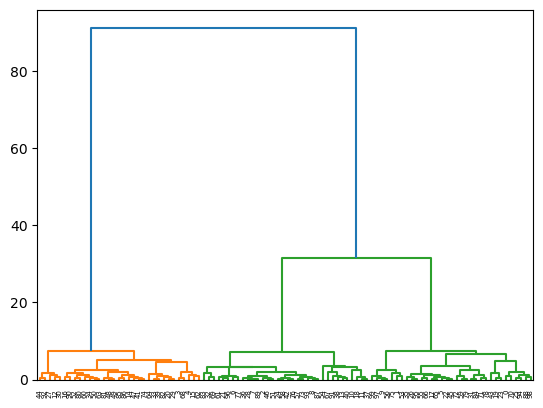

In [21]:
den = sch.dendrogram(sch.linkage(points, method = 'ward'))

In [22]:
from matplotlib import pyplot as plt

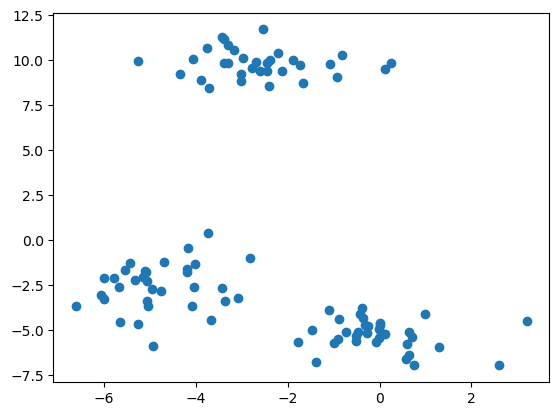

In [23]:
plt.scatter(points[:, 0], points[:,1])

In [114]:
model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
pre = model.fit_predict(points)

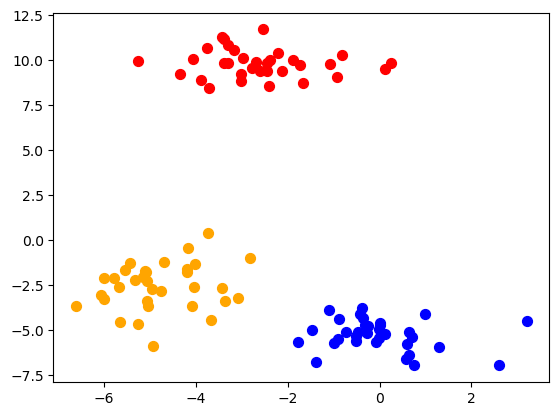

In [116]:
plt.scatter(points[pre ==0,0], points[pre == 0, 1], s = 50, c ='orange')
plt.scatter(points[pre ==1,0], points[pre == 1, 1], s = 50, c ='red')
plt.scatter(points[pre ==2,0], points[pre == 2, 1], s = 50, c ='blue')

In [117]:
import pandas as pd

agl = pd.DataFrame(points)

In [118]:
agl['Clusters'] = pre

In [119]:
agl

,0,1,Clusters
0,-3.659636,-4.446855,0
1,-3.727659,0.390970,0
2,-0.520202,-5.599053,2
3,-3.717451,8.444247,1
4,-5.254670,9.950704,1
...,...,...,...
95,-5.990561,-2.101396,0
96,-0.353744,-4.330217,2
97,-4.020106,-1.324429,0
98,-4.024097,-2.608937,0


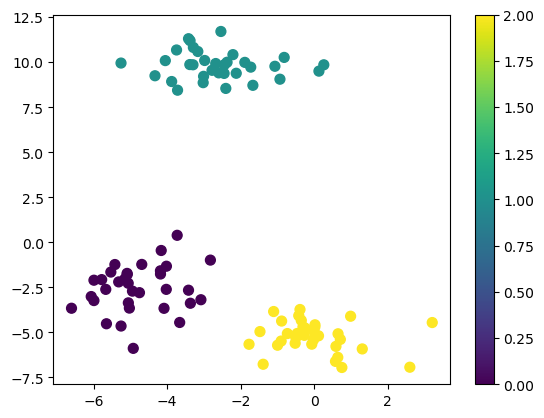

In [120]:
y = plt.scatter(agl[0], agl[1], c = agl['Clusters'], s = 50)

plt.colorbar(y)

In [141]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 50)
k_pre = kmeans.fit_predict(points)


In [146]:
centroids = kmeans.cluster_centers_
print(centroids[:,0])

[-2.61359942 -0.02005857 -4.78118305]


In [132]:
from sklearn.metrics import silhouette_score as ss
ss(points, k_pre)

0.7353758695776683

In [133]:
# sscore =[]
# for i in range(2,9):
#    kmeans = KMeans(n_clusters = i, random_state = 50) 
#    k_pre = kmeans.fit_predict(points)
#    sscore = ss(points, k_pre)
#    print(i, 'score is : ', sscore)
    

/tmp/ipykernel_148260/1962740686.py:9: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(y)


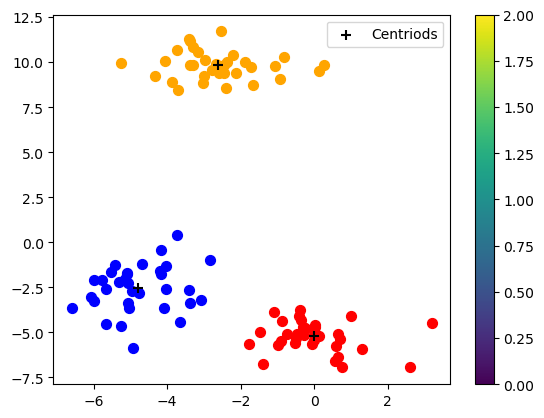

In [150]:
#Kmeans Visualization
plt.scatter(points[k_pre ==0,0], points[k_pre== 0, 1], s = 50, c ='orange')
plt.scatter(points[k_pre ==1,0], points[k_pre == 1, 1], s = 50, c ='red')
plt.scatter(points[k_pre ==2,0], points[k_pre == 2, 1], s = 50, c ='blue')
plt.scatter(centroids[:,0], centroids[:,1], s = 50, c ='black', marker = '+' , label = "Centriods")

plt.legend()

plt.colorbar(y)

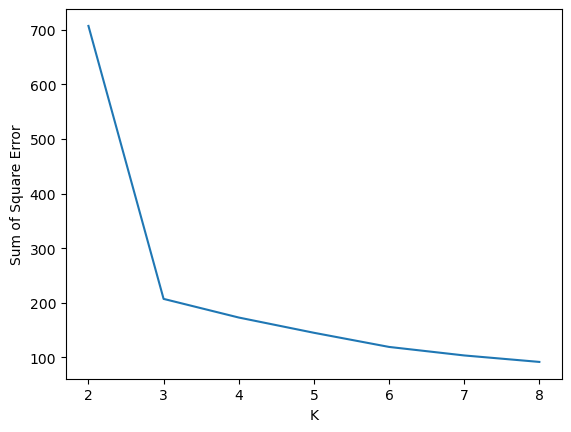

In [162]:
#Elbow Plot method to find the best number of clusters

k_range = range(2,9)
sse = []# This is the sum of square error
for i in k_range:
    km = KMeans(n_clusters = i)
    km.fit(points)
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_range, sse)

### The Elbow shape appeared at K = 3; therefore the best clauster is 3
